In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

#url = "https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt"
#webpage = urllib.request.urlopen(url)
#datareader = csv.reader(io.TextIOWrapper(webpage))

data=pd.read_csv('AmesHousing.txt',delimiter='\t')
train=data.iloc[:1460]
test=data.iloc[1460:]
target='SalePrice'
data.shape

(2930, 82)

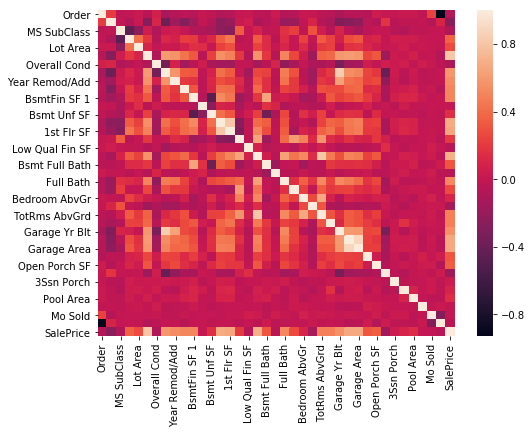

In [27]:
corr=train.corr()
fig,ax=plt.subplots(figsize=(8,6))

sns.heatmap(corr)

In [28]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Total Bsmt SF      0.683037
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Year Built         0.591436
Garage Yr Blt      0.561873
Year Remod/Add     0.545219
Full Bath          0.518194
Mas Vnr Area       0.516852
BsmtFin SF 1       0.513160
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Lot Frontage       0.365075
Open Porch SF      0.344383
Wood Deck SF       0.319104
Bsmt Full Bath     0.314536
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Bsmt Unf SF        0.150337
Pool Area          0.145474
Bedroom AbvGr      0.106941
Screen Porch       0.100121
3Ssn Porch         0.038699
BsmtFin SF 2       0.000770
Misc Val          -0.009903
Mo Sold           -0.011901
Yr Sold           -0.042695
Bsmt Half Bath    -0.055288
Low Qual Fin SF   -0.060352
Order             -0.068181
MS SubClass       -0.088504
Overall Cond      -0

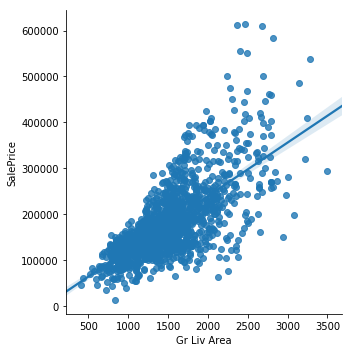

In [29]:
sns.lmplot(x='Gr Liv Area',y='SalePrice',data=train)

#### Linear model fitting using Scikit-learn

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(train[['Gr Liv Area']],train['SalePrice'])
print('Coeff is:',lr.coef_)
print('Intercept is:',lr.intercept_)

prediction_test=lr.predict(test[['Gr Liv Area']])
prediction_train=lr.predict(train[['Gr Liv Area']])

mse_test=mean_squared_error(test['SalePrice'],prediction_test)
mse_train=mean_squared_error(train['SalePrice'],prediction_train)

rmse_test=mse_test**(1/2)
rmse_train=mse_train**(1/2)
print('rmse_test is:',rmse_test)
print('rmse_train is:',rmse_train)

Coeff is: [ 116.86624683]
Intercept is: 5366.82171006
rmse_test is: 57088.2516126
rmse_train is: 56034.3620014


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

#### Multiple Regression 

In [123]:
#only selects the integer and float columns.
num_train=train.select_dtypes(include=['int','float'])
num_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Mas Vnr Area       1449 non-null float64
BsmtFin SF 1       1459 non-null float64
BsmtFin SF 2       1459 non-null float64
Bsmt Unf SF        1459 non-null float64
Total Bsmt SF      1459 non-null float64
1st Flr SF         1460 non-null int64
2nd Flr SF         1460 non-null int64
Low Qual Fin SF    1460 non-null int64
Gr Liv Area        1460 non-null int64
Bsmt Full Bath     1459 non-null float64
Bsmt Half Bath     1459 non-null float64
Full Bath          1460 non-null int64
Half Bath          1460 non-null int64
Bedroom AbvGr      

In [124]:
#dropping invalid columns in regression
num_train=num_train.drop(['PID','Mo Sold','Yr Sold'],axis=1)

#displaying numerical columns with no missing values
null_series=num_train.isnull().sum()
full_cols_train=null_series[null_series==0]
#full_cols_train

In [125]:
#selecting a subset of train dataset that only contains numerical values and do not have missing values.
train_subset=train[full_cols_train.index]

#find the correlation of these features with target variable.
corrmatrix=train_subset.corr()
sorted_corrs=corrmatrix['SalePrice'].abs().sort_values(ascending=False)
sorted_corrs

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Year Built         0.591436
Year Remod/Add     0.545219
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Enclosed Porch     0.165873
Pool Area          0.145474
Kitchen AbvGr      0.130843
Bedroom AbvGr      0.106941
Screen Porch       0.100121
Overall Cond       0.099395
MS SubClass        0.088504
Order              0.068181
Low Qual Fin SF    0.060352
3Ssn Porch         0.038699
Misc Val           0.009903
Name: SalePrice, dtype: float64

#### Collinearity
Now, let's define a cutoff ration for strong correlations, and explore collinearity.

Also, we define a cutoff variable for low variance features (b)

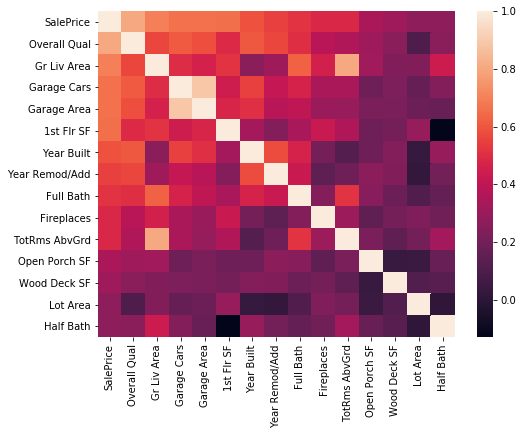

In [126]:
#strong correlation cut-off
a=0.25

#cutoff value for features variance (features with lower variance than this number will be dropped)
b=0.015

strong_corrs=sorted_corrs[sorted_corrs>a]
corrmatrix=train_subset[strong_corrs.index].corr()
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(corrmatrix,ax=ax)

`Garage Area` and `Garage Cars`, as well as `TotRms AbvGrd` and `Gr Liv Area` are highly correlated. We will drop one of each. 
Also, we will check test dataset to see if all data are available for our final selected features. 

In [127]:
final_corr_cols=strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

features=final_corr_cols.drop(['SalePrice']).index

clean_test=test[final_corr_cols.index].dropna()

In [128]:
target='SalePrice'
lr=LinearRegression()
lr.fit(train[features],train[target])

train_predictions=lr.predict(train[features])
test_predictions=lr.predict(clean_test[features])

train_rmse=np.sqrt(mean_squared_error(train[target],train_predictions))
test_rmse=np.sqrt(mean_squared_error(clean_test[target],test_predictions))

print('train rmse:',train_rmse)
print('test rmse:',test_rmse)

train rmse: 31663.4207325
test rmse: 40565.9380441


Now we'll try to remove features with lowest variance. A very low variance indicates that variables does not change with respect to our target, and hence does not affect the target values. But we'd like to bring all variances to 0-1 range in order to be consistent among our features. This task is called re-scalling.

In [129]:
rescale_train=(train[features]-train[features].min())/(train[features].max()-train[features].min())

In [130]:
sorted_vars=rescale_train.var().sort_values()
sorted_vars

Lot Area          0.001117
Open Porch SF     0.013938
Full Bath         0.018621
Garage Area       0.020347
Gr Liv Area       0.023078
Overall Qual      0.024496
1st Flr SF        0.025814
Wood Deck SF      0.033064
Fireplaces        0.046589
Year Built        0.048429
Half Bath         0.064714
Year Remod/Add    0.120438
dtype: float64

In [131]:
features.drop(sorted_vars[sorted_vars<b].index)
#fetures.drop(sorted_vars<b)
#features.drop(['Lot Area','Open Porch SF'])

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces',
       'Wood Deck SF', 'Half Bath'],
      dtype='object')

In [132]:
#re-fittin the model with the new features list
lr=LinearRegression()
lr.fit(train[features],train[target])

train_predictions=lr.predict(train[features])
test_predictions=lr.predict(clean_test[features])

train_rmse_2=np.sqrt(mean_squared_error(train[target],train_predictions))
test_rmse_2=np.sqrt(mean_squared_error(clean_test[target],test_predictions))

print('train rmse_2:',train_rmse_2)
print('test rmse_2:',test_rmse_2)

train rmse_2: 31663.4207325
test rmse_2: 40565.9380441
